# **Welcome to EDA Notebook :-)**

#**Importing Important Libraries**

In [ ]:
import csv
import math
import matplotlib.pyplot as plt 
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import seaborn as sb
import os
import os.path
from wordcloud import WordCloud

# **Importing Dataset**

Let's first import our dataset! :-)

In [ ]:
!pip install -U -q PyDrive
 
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

 
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link = 'https://drive.google.com/file/d/1KhBS2rVwN0oUGUTpAjNjHuvllmOvEwPh/view?usp=sharing'
import pandas as pd
 
# to get the id part of the file
id = link.split("/")[-2]
 
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('dfCleaned2.csv') 
 
df = pd.read_csv('dfCleaned2.csv', index_col=[0])
df['description'] = df['description'].apply(str) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30304 entries, 148 to 52477
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   bookId                30304 non-null  object 
 1   title                 30304 non-null  object 
 2   rating                30304 non-null  float64
 3   description           30304 non-null  object 
 4   genres                30304 non-null  object 
 5   pages                 29545 non-null  float64
 6   numRatings            30304 non-null  int64  
 7   coverImg              30304 non-null  object 
 8   fiction               30304 non-null  int64  
 9   fantasy               30304 non-null  int64  
 10  romance               30304 non-null  int64  
 11  young adult           30304 non-null  int64  
 12  contemporary          30304 non-null  int64  
 13  adult                 30304 non-null  int64  
 14  nonfiction            30304 non-null  int64  
 15  history          

In [ ]:
top30genrelist = ['fiction',
'fantasy',
'romance',
'young adult',
'contemporary',
'adult',
'nonfiction',
'history',
'novels',
'mystery',
'historical fiction',
'audiobook',
'science fiction',
'paranormal',
'literature',
'adventure',
'classics',
'thriller',
'childrens',
'magic',
'humor',
'contemporary romance',
'crime',
'suspense',
'middle grade',
'chick lit',
'biography',
'teen',
'horror',
'philosophy']

# **Helper Functions** 

In [ ]:
def save_genre_pdf_given_genre_plots(data, labels):
    for idx, col in enumerate(labels):
        df_sum_given_genre = pd.DataFrame({'Genre':labels, 'Total': data[data[col]==1][labels].sum()})
        df_sum_given_genre = df_sum_given_genre.sort_values('Total', ascending=False).head(10)
        df_sum_given_genre['Total'] = df_sum_given_genre['Total']/df_sum_given_genre['Total'].max()
        ax = plt.figure(figsize=(9, 9)).add_subplot(1, 1, 1)
        sb.barplot(data=df_sum_given_genre, x='Genre', y='Total', axes=ax)
        ax.set(title='Distribution given {0} Genre'.format(col), xlabel='', ylabel='Normalized Number of Books')
        plt.xticks(rotation=90)
        plt.savefig('./Images/results/genre_pdf_given_{0}.png'.format(col), bbox_inches='tight')
        plt.close()
        
def save_genre_pdf_given_genre_subplots(data, labels):
    num_plot = 3
    fig_per_plot = math.ceil(len(top30genrelist)/num_plot)
    num_cols = 3
    num_rows = math.ceil(fig_per_plot/num_cols)
    for idx, col in enumerate(top30genrelist):
        if idx%fig_per_plot==0:
            fig = plt.figure(figsize=(20, 30))
        df_sum_given_genre = pd.DataFrame({'Genre':labels, 'Total': data[data[col]==1][labels].sum()})
        df_sum_given_genre = df_sum_given_genre.sort_values('Total', ascending=False).head(10)
        df_sum_given_genre['Total'] = df_sum_given_genre['Total']/df_sum_given_genre['Total'].max()
        ax = fig.add_subplot(num_rows, num_cols, idx%fig_per_plot+1)
        sb.barplot(data=df_sum_given_genre, x='Genre', y='Total', axes=ax)
        ax.set(title='Distribution given {0} Genre'.format(col), xlabel='', ylabel='Normalized Number of Movies')
        plt.xticks(rotation=90)
        if (idx+1)%fig_per_plot==0 or idx==len(top30genrelist)-1:
            plt.savefig('./Images/results/genre_pdf_part{0}.png'.format(1+idx//fig_per_plot), bbox_inches='tight')
            plt.close()
            fig = plt.figure(figsize=(20, 30))

def save_numGenre_pdf_given_genre_plots(data, labels):
    for idx, col in enumerate(labels):
        df_genre_per_book = pd.DataFrame({'Total': data[data[col]==1][labels].sum(axis = 1)})
        df_numG_given_genre = pd.DataFrame(df_genre_per_book['Total'].value_counts().sort_index().head(10))
        df_numG_given_genre['Total'] = df_numG_given_genre['Total']/df_numG_given_genre['Total'].max()
        ax = plt.figure(figsize=(9, 9)).add_subplot(1, 1, 1)
        sb.barplot(data=df_numG_given_genre, x=df_numG_given_genre.index, y='Total', axes=ax)
        ax.set(title='Number of Genres distribution given {0} Genre'.format(col), xlabel='', ylabel='Normalized Number of Books')
        plt.xticks(rotation=90)
        plt.savefig('./Images/results/numGenre_pdf_given_{0}.png'.format(col), bbox_inches='tight')
        plt.close()
        
def save_numGenre_pdf_given_genre_subplots(data, labels):
    num_plot = 3
    fig_per_plot = math.ceil(len(top30genrelist)/num_plot)
    num_cols = 3
    num_rows = math.ceil(fig_per_plot/num_cols)
    for idx, col in enumerate(top30genrelist):
        if idx%fig_per_plot==0:
            fig = plt.figure(figsize=(20, 30))
        df_genre_per_book = pd.DataFrame({'Total': data[data[col]==1][labels].sum(axis=1)})
        df_numG_given_genre = pd.DataFrame(df_genre_per_book['Total'].value_counts().sort_index().head(10))
        df_numG_given_genre['Total'] = df_numG_given_genre['Total']/df_numG_given_genre['Total'].max()
        
        ax = fig.add_subplot(num_rows, num_cols, idx%fig_per_plot+1)
        sb.barplot(data=df_numG_given_genre, x=df_numG_given_genre.index, y='Total', axes=ax)
        ax.set(title='Number of Genres distribution given {0} Genre'.format(col), xlabel='', ylabel='Normalized Number of Movies')
        plt.xticks(rotation=90)
        if (idx+1)%fig_per_plot==0 or idx==len(top30genrelist)-1:
            plt.savefig('./Images/results/numGenre_pdf_part{0}.png'.format(1+idx//fig_per_plot), bbox_inches='tight')
            plt.close()
            fig = plt.figure(figsize=(20, 30))

def save_wordcloud_plots(data, labels):
    for idx, col in enumerate(labels):
        wordcloud = WordCloud(max_font_size=50).generate(' '.join(data[data[col]==1]['description']))
        ax = plt.figure(figsize=(9, 9)).add_subplot(1, 1, 1)
        ax.imshow(wordcloud)
        ax.axis("off")
        ax.set(title='Book Genre: {0}'.format(col))
        plt.savefig('./Images/results/wordcloud_{0}.png'.format(col), bbox_inches='tight')
        plt.close()
        
def save_wordcloud_subplots(data, labels):
    num_plot = 3
    fig_per_plot = 10 #math.ceil(len(category_columns)/num_plot)
    num_cols = 2
    num_rows = math.ceil(fig_per_plot/num_cols)
    for idx, col in enumerate(top30genrelist):
        if idx%fig_per_plot==0:
            fig = plt.figure(figsize=(14, 20))
        wordcloud = WordCloud(max_font_size=50).generate(' '.join(df[df[col]==1]['description']))
        ax = fig.add_subplot(num_rows, num_cols, idx%fig_per_plot+1)
        ax.imshow(wordcloud)
        ax.axis("off")
        ax.set(title='Book Genre: {0}'.format(col))
        if (idx+1)%fig_per_plot==0 or idx==len(top30genrelist)-1:
            plt.savefig('./Images/results/wordcloud_part{0}.png'.format(1+idx//fig_per_plot), bbox_inches='tight')
            plt.close()
            fig = plt.figure(figsize=(14, 20))

# **Genre Distribution**
We will be looking at:


*   Number of Books per Genre: To see which is the most common genre.
*   Number of Genres per Book: To see on average, one book has how many genre.
*   Number of Genres per Genre: To see on average, how many other Genres does a book of a particular Genre has.



##**Number of Books per Genre**

We analyse the Number of Books per Genre to see which is the most common genre.

In [ ]:
# Iterates through the dataframe and calculate the number of books in each genre
for g in top30genrelist:
    print(f"{g:3}  {df[g].value_counts()[1]:6}")

fiction   21590
fantasy   10694
romance   10862
young adult    9228
contemporary    7094
adult    6876
nonfiction    7253
history    9423
novels    6408
mystery    5387
historical fiction    5182
audiobook    4154
science fiction    4449
paranormal    4676
literature    4320
adventure    4449
classics    3746
thriller    3429
childrens    3720
magic    2991
humor    2814
contemporary romance    2652
crime    2403
suspense    2385
middle grade    2543
chick lit    2256
biography    2270
teen    3296
horror    1916
philosophy    1582


**Plotting the distribution of books per genre:**

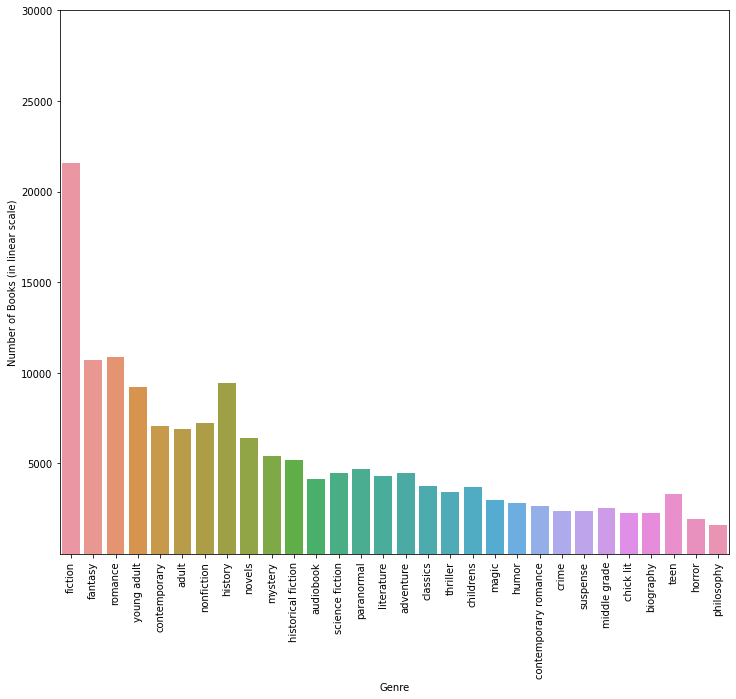

In [ ]:
# Plots out the number of books in each genre
sum_genre = df[top30genrelist].sum()
df_book_per_genre = pd.DataFrame({'Genre':top30genrelist, 'Total': sum_genre})
f, ax = plt.subplots(1, 1, figsize=(12, 10))
sb.barplot(data=df_book_per_genre, x='Genre', y='Total', axes=ax)
ax.set(yscale='linear', ylim=(1, 30000), ylabel='Number of Books (in linear scale)')
plt.xticks(rotation=90)
plt.show()

Observation on Number of Books per Genre:


*   Most common genre is Fiction with **28203** books in Fictional genre.
*   Least common genre is Philosophy with **2111** books in Philosophy category.




## **Number of Genres per Book**


We analyse the Number of Genres per Book to see on average, one book has how many genre.


**Plotting the distribution of genres per book:**

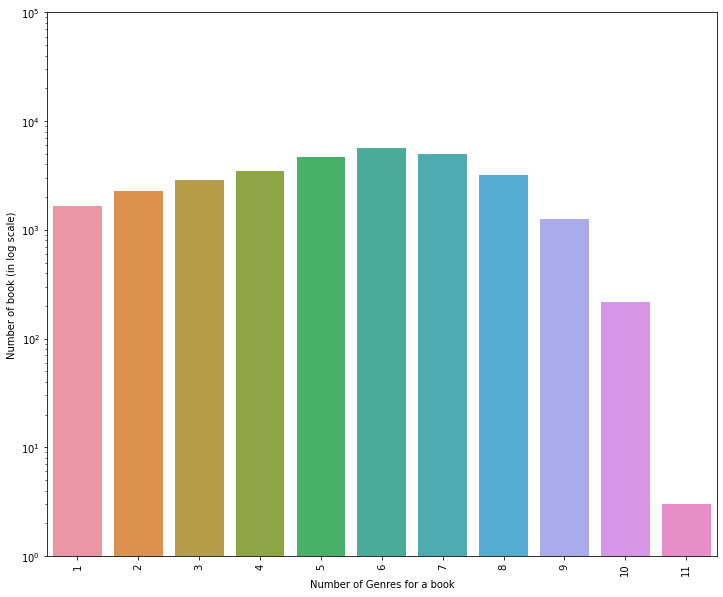

In [ ]:
# Plots out the number of genres for each book
sum_book = df[top30genrelist].sum(axis=1)
df_genres_per_book = pd.DataFrame({'title': df.title, 'num_genres':sum_book}).groupby('num_genres').count()
f, ax = plt.subplots(1, 1, figsize=(12, 10))
sb.barplot(data=df_genres_per_book, x=df_genres_per_book.index, y='title', axes=ax)
ax.set(yscale='log', ylim=(1, 1e5), xlabel='Number of Genres for a book', ylabel='Number of book (in log scale)')
plt.xticks(rotation=90)
plt.show()

Observation on Number of Genres per book:

*   Books are classified into 5.37 genres on average
*   There are 4 books with a grand total of 11 genres at one time!

## **Number of Genres given a Genre**

We plot out the number of genres to see on average, how many other Genres does a book of a particular Genre has.


In [ ]:
if not os.path.exists('Images'):
    os.makedirs('Images')
    os.makedirs('Images/results/')
    
if not os.path.exists('Images/results/numGenre_pdf_given_Action.png'):
    save_numGenre_pdf_given_genre_plots(df, top30genrelist)
if not os.path.exists('Images/results/numGenre_pdf_part1.png'):
    save_numGenre_pdf_given_genre_subplots(df, top30genrelist)

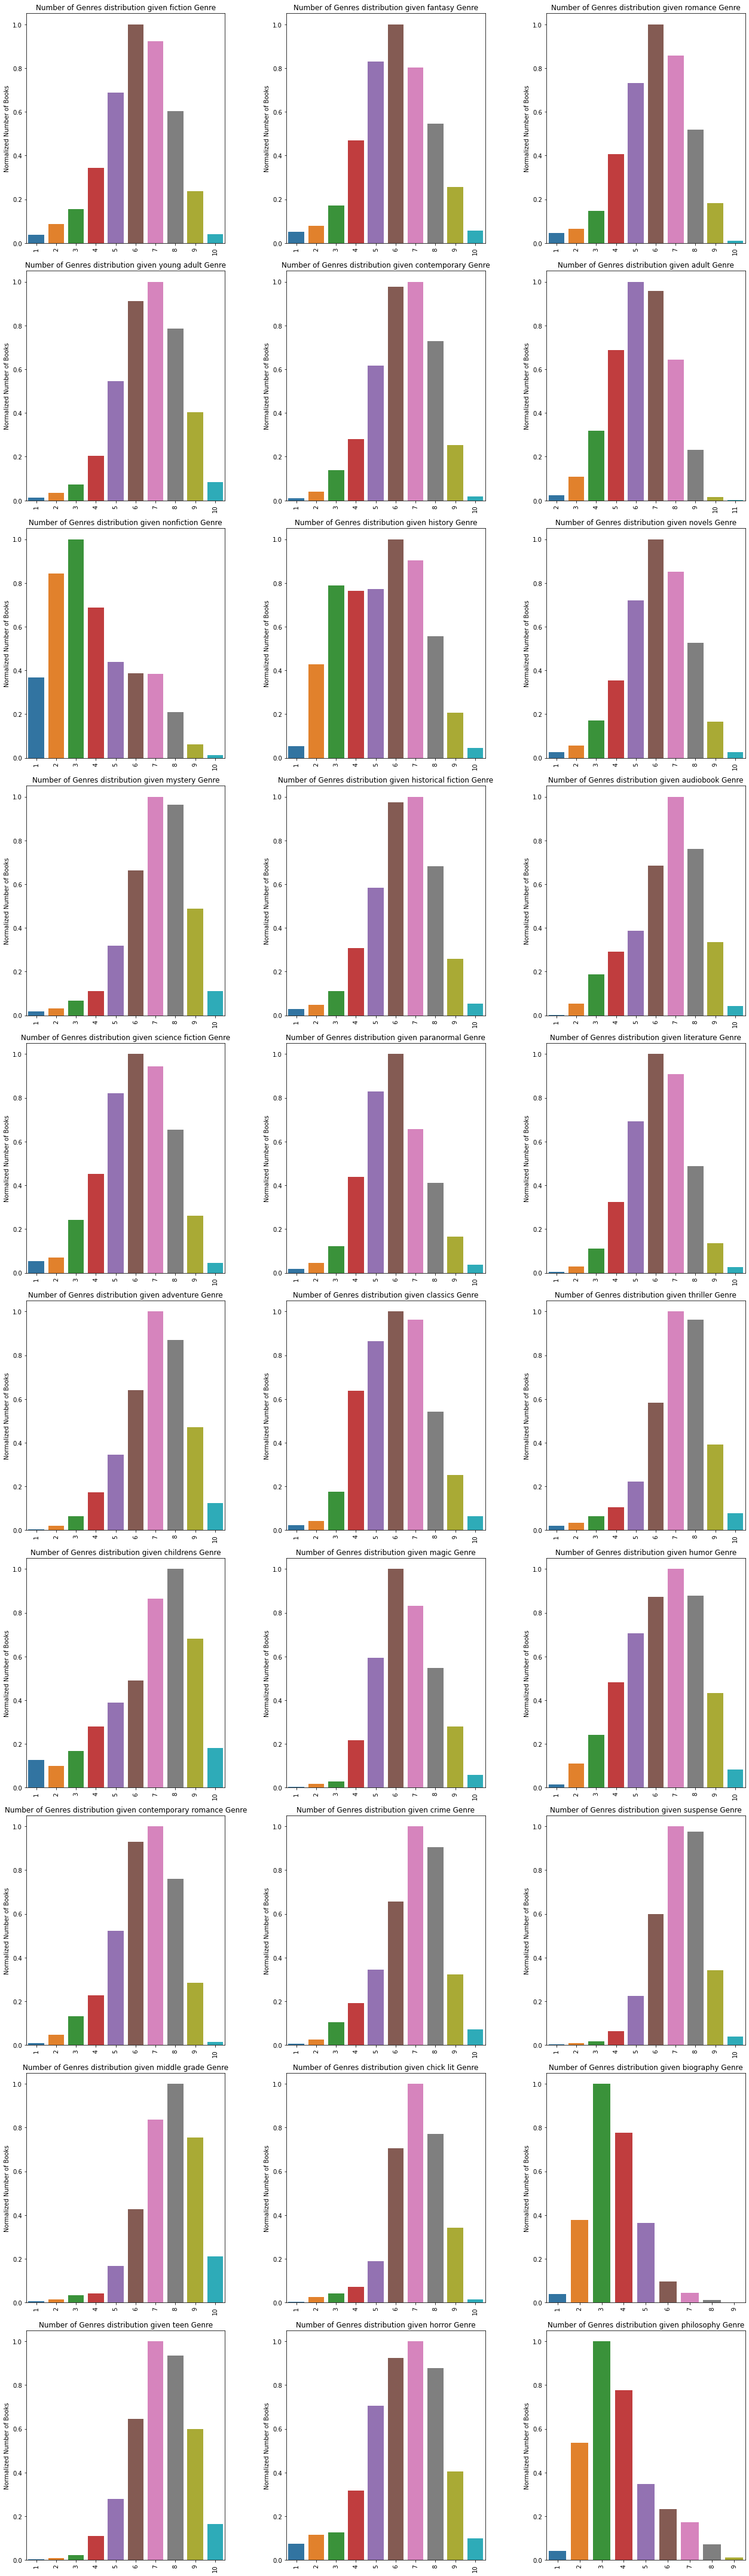

In [ ]:
fig = plt.figure(figsize=(18, 60))
num_cols = 3
num_rows = math.ceil(len(top30genrelist)/num_cols)
for idx, col in enumerate(top30genrelist):
    df_genre_per_book = pd.DataFrame({'Total': df[df[col]==1][top30genrelist].sum(axis=1)})
    df_numG_given_genre = pd.DataFrame(df_genre_per_book['Total'].value_counts().sort_index().head(10))
    df_numG_given_genre['Total'] = df_numG_given_genre['Total']/df_numG_given_genre['Total'].max()
    ax = fig.add_subplot(num_rows, num_cols, idx+1)
    sb.barplot(data=df_numG_given_genre, x=df_numG_given_genre.index, y='Total', axes=ax)
    ax.set(title='Number of Genres distribution given {0} Genre'.format(col), xlabel='', ylabel='Normalized Number of Books')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Observation from Number of Genres per Genre


*   Most genres generally have 6 to 8 other genres: Fiction, Fantasy, Romance, Young Adult, Comtemporary, Adult, Novel, Mystery, Historial Fiction, Audiobook, Science Fiction, Paranormal, Literature, Adventure, Classics, Thriller, Children, Magic, Humor, Contemporary Romance, Crime, Suspense, Middle Grade, Chick Lit, Teen, Horror

*   Genres like Non-fiction, Biography, Philosophy generally have 3 to 4 genres. 




#**Heatmap Plot**
We plot a Heatmap to show the correlation between each genre. 

*i.e. When a book is classified under genre A, how likely is it to also be classified under genre B?*

<function matplotlib.pyplot.show>

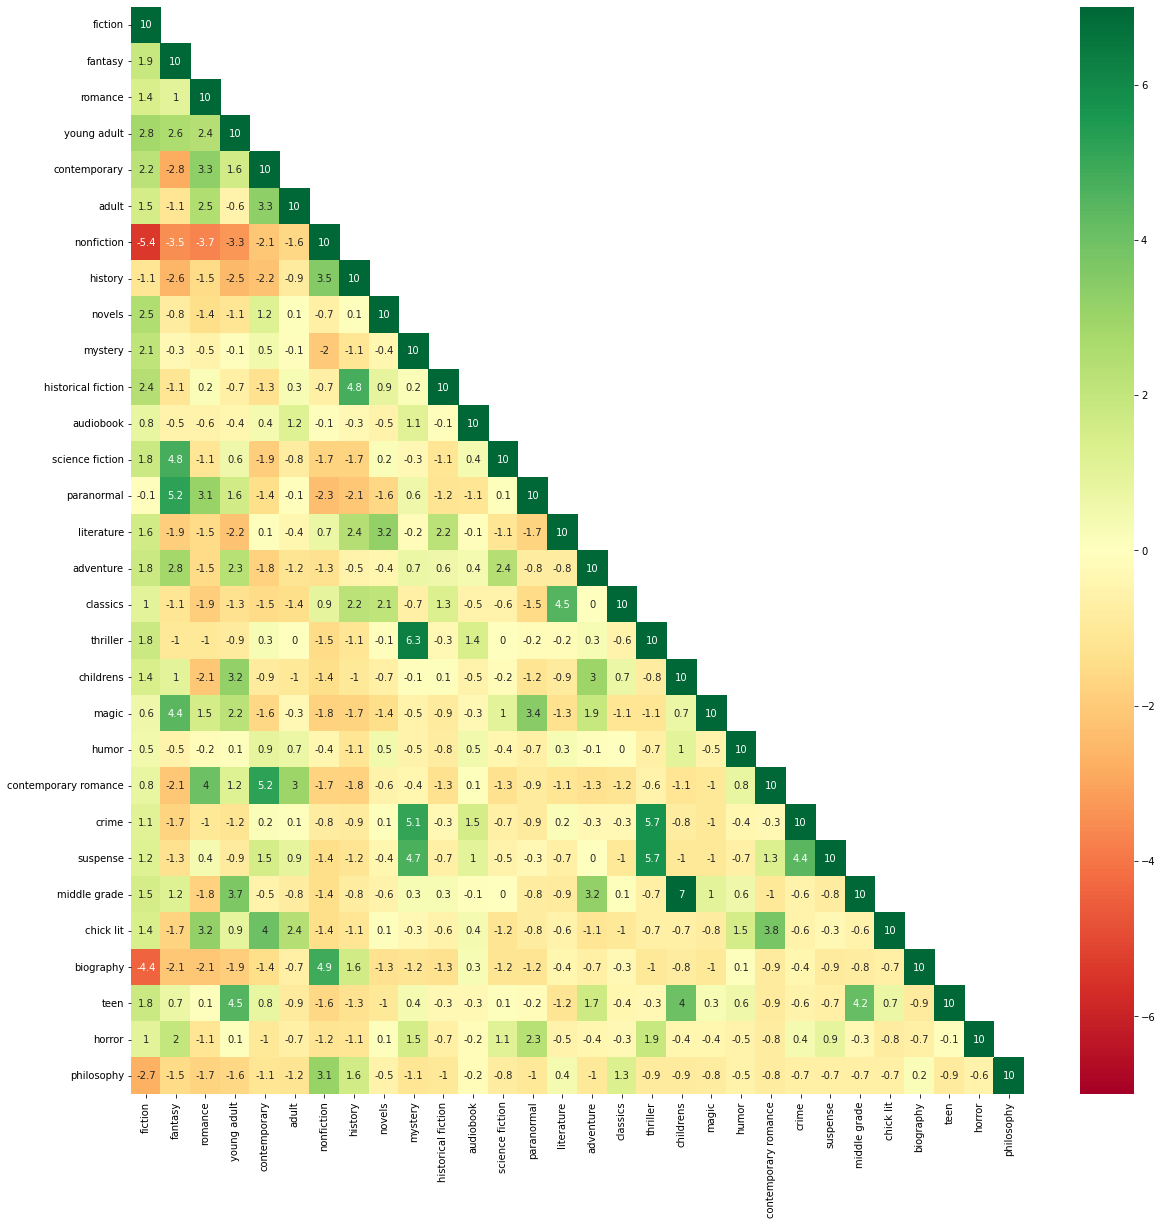

In [ ]:
# Heatmap relative to all numeric columns

corr_matrix = (df[top30genrelist].astype('int')).corr()
mask = np.array(corr_matrix)
mask[np.tril_indices_from(mask)] = False
corr_matrix = (100*corr_matrix//1)/10

fig = plt.figure(figsize=(20, 20))
sb.heatmap(corr_matrix, mask=mask, annot=True, cbar=True, vmax=7, vmin=-7, cmap='RdYlGn')
plt.show

Observations from Heatmap Plot
1.   `Children` and `Middle Grade` had a positive correlation of ***7***
2.   `mystery` and `thriller` came in 2nd with a correlation of ***6.5***
3.  `non fiction` and `fiction` had the most negative correlation of ***-5.6***
4. `biography` and `fiction` came in 2nd with a negative correlation of ***-4.6***

5. `Humour` and `Audiobooks` were observed generally to be a category on its own without any significant correlations with other genres.

---

These Genre categories show strong positive correlation with each other (>=2.5) 📈

* **fiction** => young adults, novels, 
* **fantasy** => young adults, science fiction, paranormal, adventure, magic, 
* **chick lit** => romance, contemporary romance, paranormal, contemporary
* **young adult** => teen, middle grade, childrens
* **contemporary** => chicklit, contemporary romance, adult
* **adult** => contemporary romance
* **nonfiction** => philosophy, biography, history
* **history** => historical fiction
* **novels** => literature
* **mystery** => crime, suspense, thriller
* **paranormal** => magic
* **literature** => classics
* **adventure** => middle grade, children
* **thriller** => crime, suspense
* **childrens** => middle grade, teen
* **contemporary romance** => chick lit
* **crime** => suspense
* **middle grade** => teen


---


These Genre categories show strong negative correlation with each other(<=-2.5) 📉


*   **fiction**, philiosophy, biography, nonfiction
*   **fantasy**, history, nonfiction, contemporary
*   **romance**, nonfiction
*   **young adult**, nonfiction

# **Multi-Genre Distribution Plot**

We plot a Multi-Genre Distribution Plot to show the various other genres that a book is classified under when given a particular genre of book.

*i.e. For a Fiction book, what other genres it most likely have?*

In [ ]:
import os.path
if not os.path.exists('Images'):
    os.makedirs('Images')
    os.makedirs('Images/results/')
    
if not os.path.exists('Images/results/genre_pdf_given_Action.png'):
    save_genre_pdf_given_genre_plots(df, top30genrelist)
if not os.path.exists('Images/results/genre_pdf_part1.png'):
    save_genre_pdf_given_genre_subplots(df, top30genrelist)

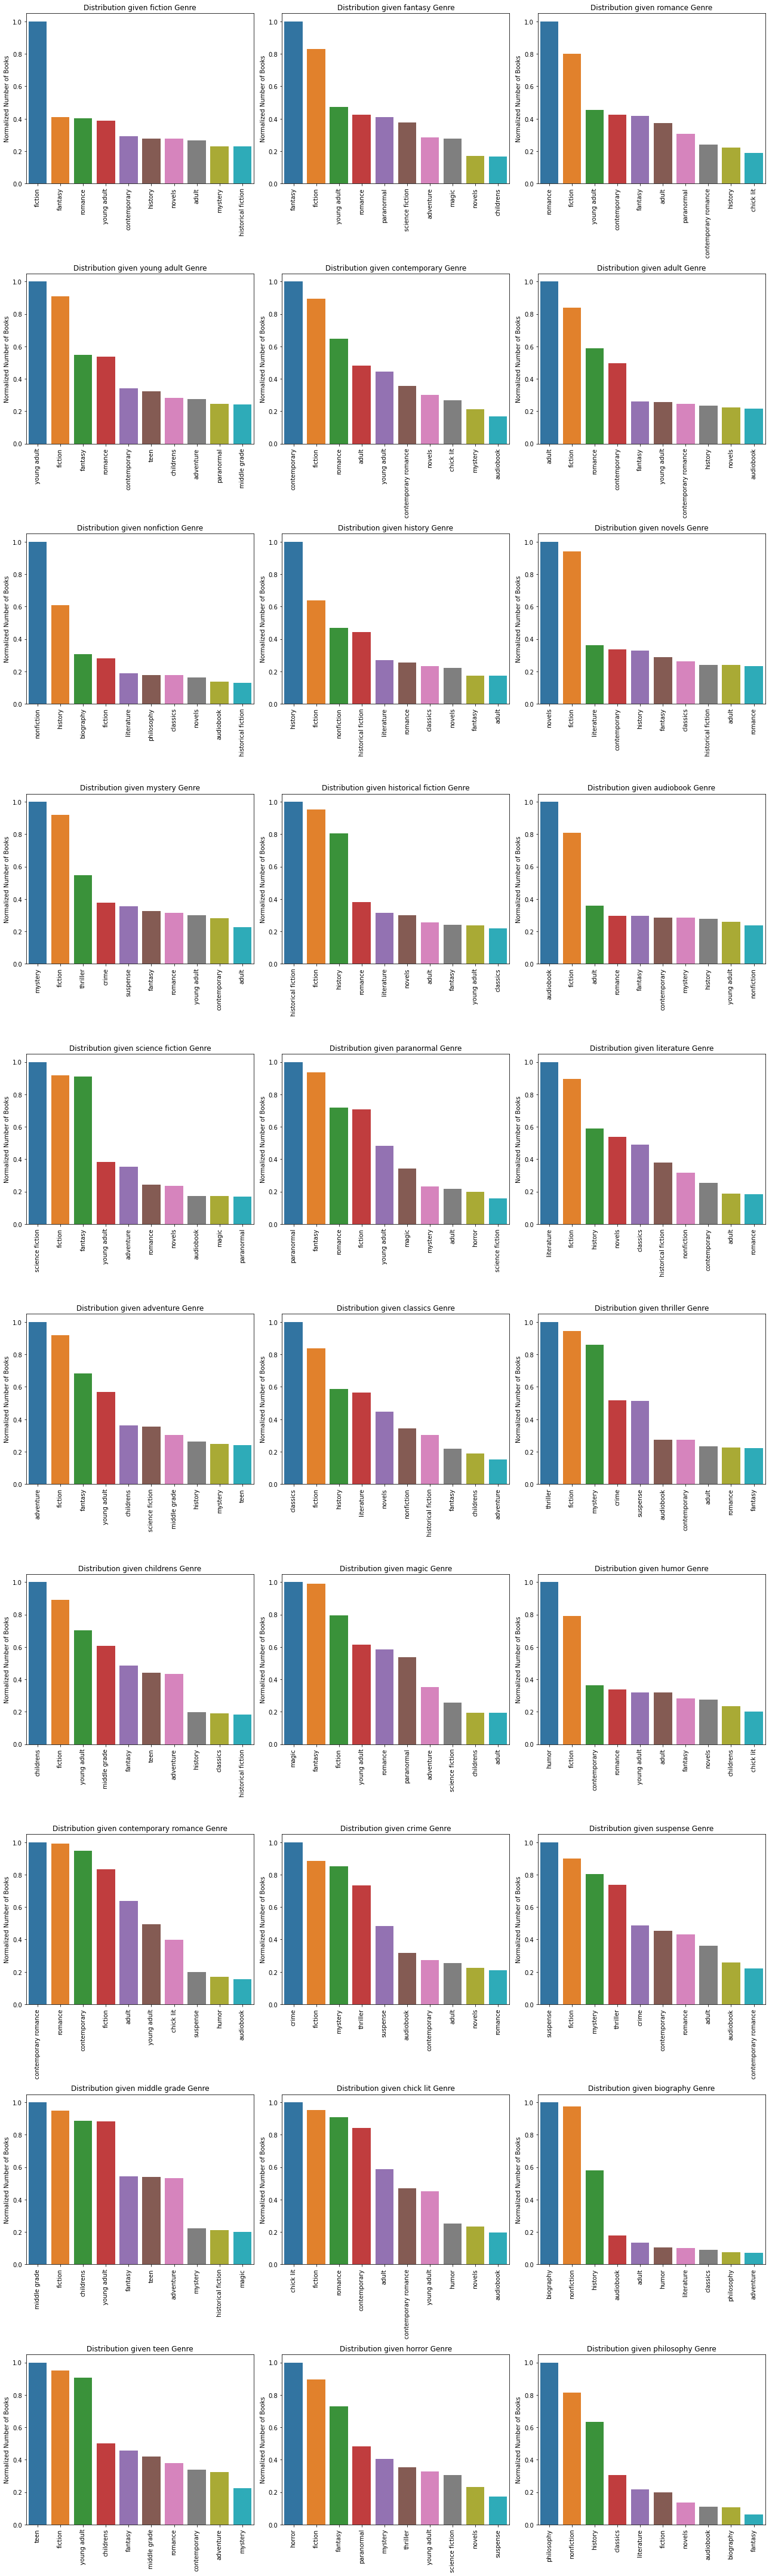

In [ ]:
fig = plt.figure(figsize=(18, 60))
num_cols = 3
num_rows = math.ceil(len(top30genrelist)/num_cols)
for idx, col in enumerate(top30genrelist):
    df_sum_given_genre = pd.DataFrame({'Genre':top30genrelist, 'Total': df[df[col]==1][top30genrelist].sum()})
    df_sum_given_genre = df_sum_given_genre.sort_values('Total', ascending=False).head(10)
    df_sum_given_genre['Total'] = df_sum_given_genre['Total']/df_sum_given_genre['Total'].max()
    ax = fig.add_subplot(num_rows, num_cols, idx+1)
    sb.barplot(data=df_sum_given_genre, x='Genre', y='Total', axes=ax)
    ax.set(title='Distribution given {0} Genre'.format(col), xlabel='', ylabel='Normalized Number of Books')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Observations on Multi-Genre Distribution Plot

Fiction
*   Generally across the board, `23/30` of the genres have more than **80%** of their books also falling into the `fiction` category.
  * We thus see that `fiction` is generally a very popular category and tends to encompass many sub genres.

Romance
*   Almost **60%** of `Chicklit`, `Contemporary`, `Contemporary Romance` and `Adult` Books are also categorised under `Romance`, as these are common themes associated with their demographics of teen girls and adults.

Paranormal & Fantasy
* **90%** of `paranormal` books also fall under `fantasy`
  * Quite surprisingly, **70%** of `paranormal` books also fall under `romance`, two themes that would seem unrelated.
* Close to ***98%*** of `fantasy` books are also in the `magic` category.

Age Related
* **50%** of `young adult` books also fall under `fantasy` and `romance` respectively, which are popular themes for this age group
* **90%** of `Teen` books are also `Young Adult` books
* **90%** of `Middle Grade` books are also `Children` books

Thriller, Mystery, Suspense
* **90%** of `thriller` books are also in `mystery` and 50% of it is in `crime`
  * however, only **50%** of `mystery` books is in the `thriller` category
  * Generally, `thriller` is a subset of `mystery`
  * **80%** of `suspense` books fall under the `mystery` category and **76%** fall under `thriller`
  * These 3 genres tend to be closely linked

Non Fiction
* **60%** of `Philosophy` also fall in `History`
* Around the **50%** of `Literature` books also fall in `History`, `Novels`, `Classics` genre


# **Word Cloud Plot**

In [ ]:
df['description'] = df['description'].apply(str) 


In [ ]:
if not os.path.exists('Images/results/wordcloud_Action.png'):
    save_wordcloud_plots(df, top30genrelist)
if not os.path.exists('Images/results/wordcloud_part1.png'):
    save_wordcloud_subplots(df, top30genrelist)

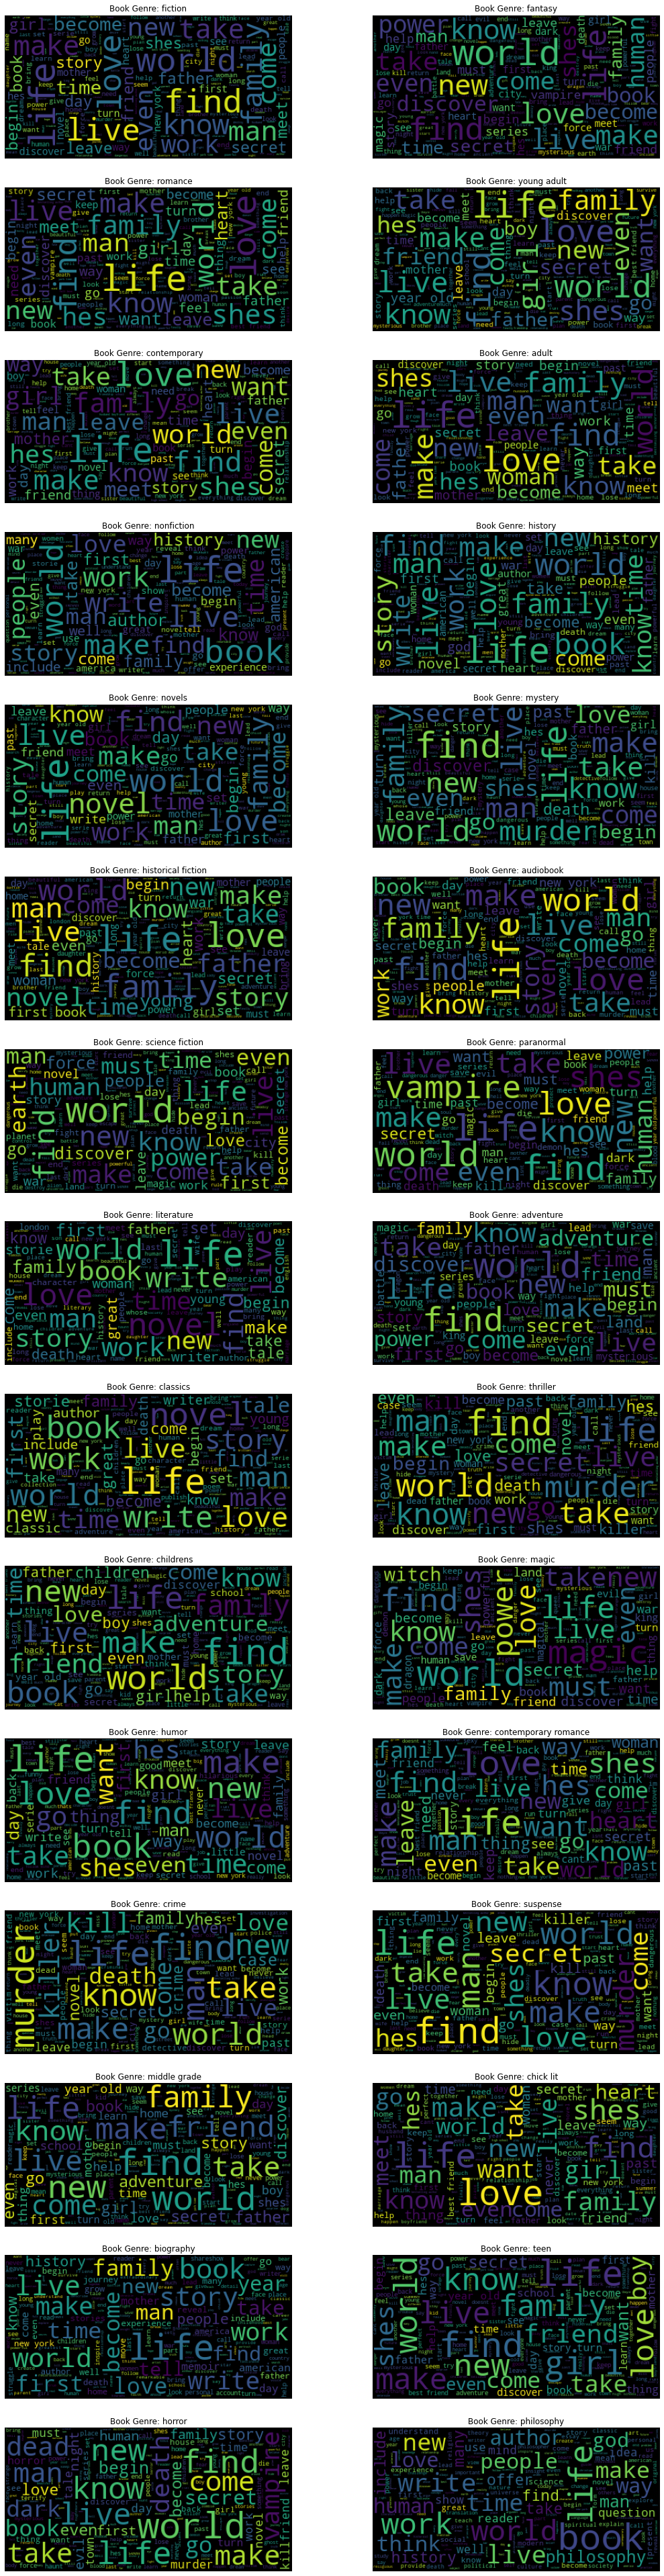

In [ ]:
fig = plt.figure(figsize=(18, 70))
num_cols = 2
num_rows = math.ceil(len(top30genrelist)/num_cols)
for idx, col in enumerate(top30genrelist):
    wordcloud = WordCloud(max_font_size=50).generate(' '.join(df[df[col]==1]['description']))
    ax = fig.add_subplot(num_rows, num_cols, idx+1)
    ax.imshow(wordcloud)
    ax.axis("off")
    ax.set(title='Book Genre: {0}'.format(col))
plt.show()

Observation from Word Cloud Plot 

`world` and `life` seems to be common word often used in book descriptions no matter the genre. However, these commonalities among the genres will be eventually removed using the `Tfidf Vectorizer` with `max_df` so they are not a concern.

Specifically:
* `work` appears in Fiction, Nonfiction, Biography, Classics, Literature.
* `earth` in Science Fiction
* `death`, `murder`, `kill`, `secret` in Crime, Mystery, Suspense and Thriller
* `vampire` in Paranormal and Horror
* `power` in Adventure, Magic, Fantasy and Paranormal
* `friend` in Teen and Middle Grade
* `Tale`, `Novel` in Classics
* `American` in Biography
* `god` in Philosophy

Secondary common key words include: 
`family`, `love`, and `find` which presumably would be linked to `finding love`are found across all genres.

# **Analysing Numerical Variables w.r.t. each genre**


## **Analysing Brightness vs Genre**

To see if the different brightness of cover page affects the genre the book is in.

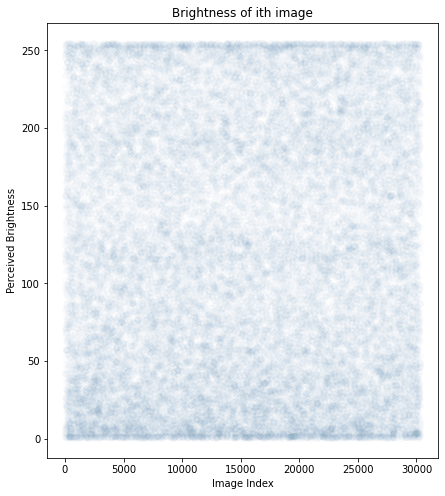

In [ ]:
brightness_images = [df.brightness]
fig = plt.figure(figsize=(7, 8))
plt.scatter(np.arange(0,len(df),1),brightness_images,alpha=0.01)
plt.title('Brightness of ith image')
plt.xlabel('Image Index')
plt.ylabel('Perceived Brightness')
plt.show()

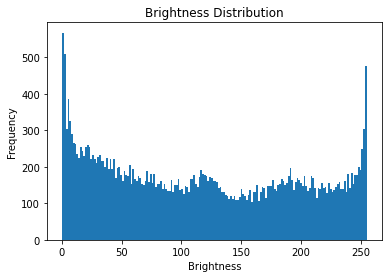

Mean: 116.49217762963674 
Std : 79.92150128303423


In [ ]:
plt.hist(brightness_images,bins=int(np.sqrt(len(df))))
plt.title('Brightness Distribution')
plt.xlabel('Brightness')
plt.ylabel('Frequency')
plt.show();

print('Mean: ' + str(np.mean(brightness_images)),
      '\nStd : ' + str(np.std(brightness_images)))

Observation from Brightness plot

We see that the book covers tend to go for medium brightness or either very low or high brightness (At the extremes), with the rest of books leaning in between.

We plot `Brightness` against `Genres` to visualize their mutual relationship.

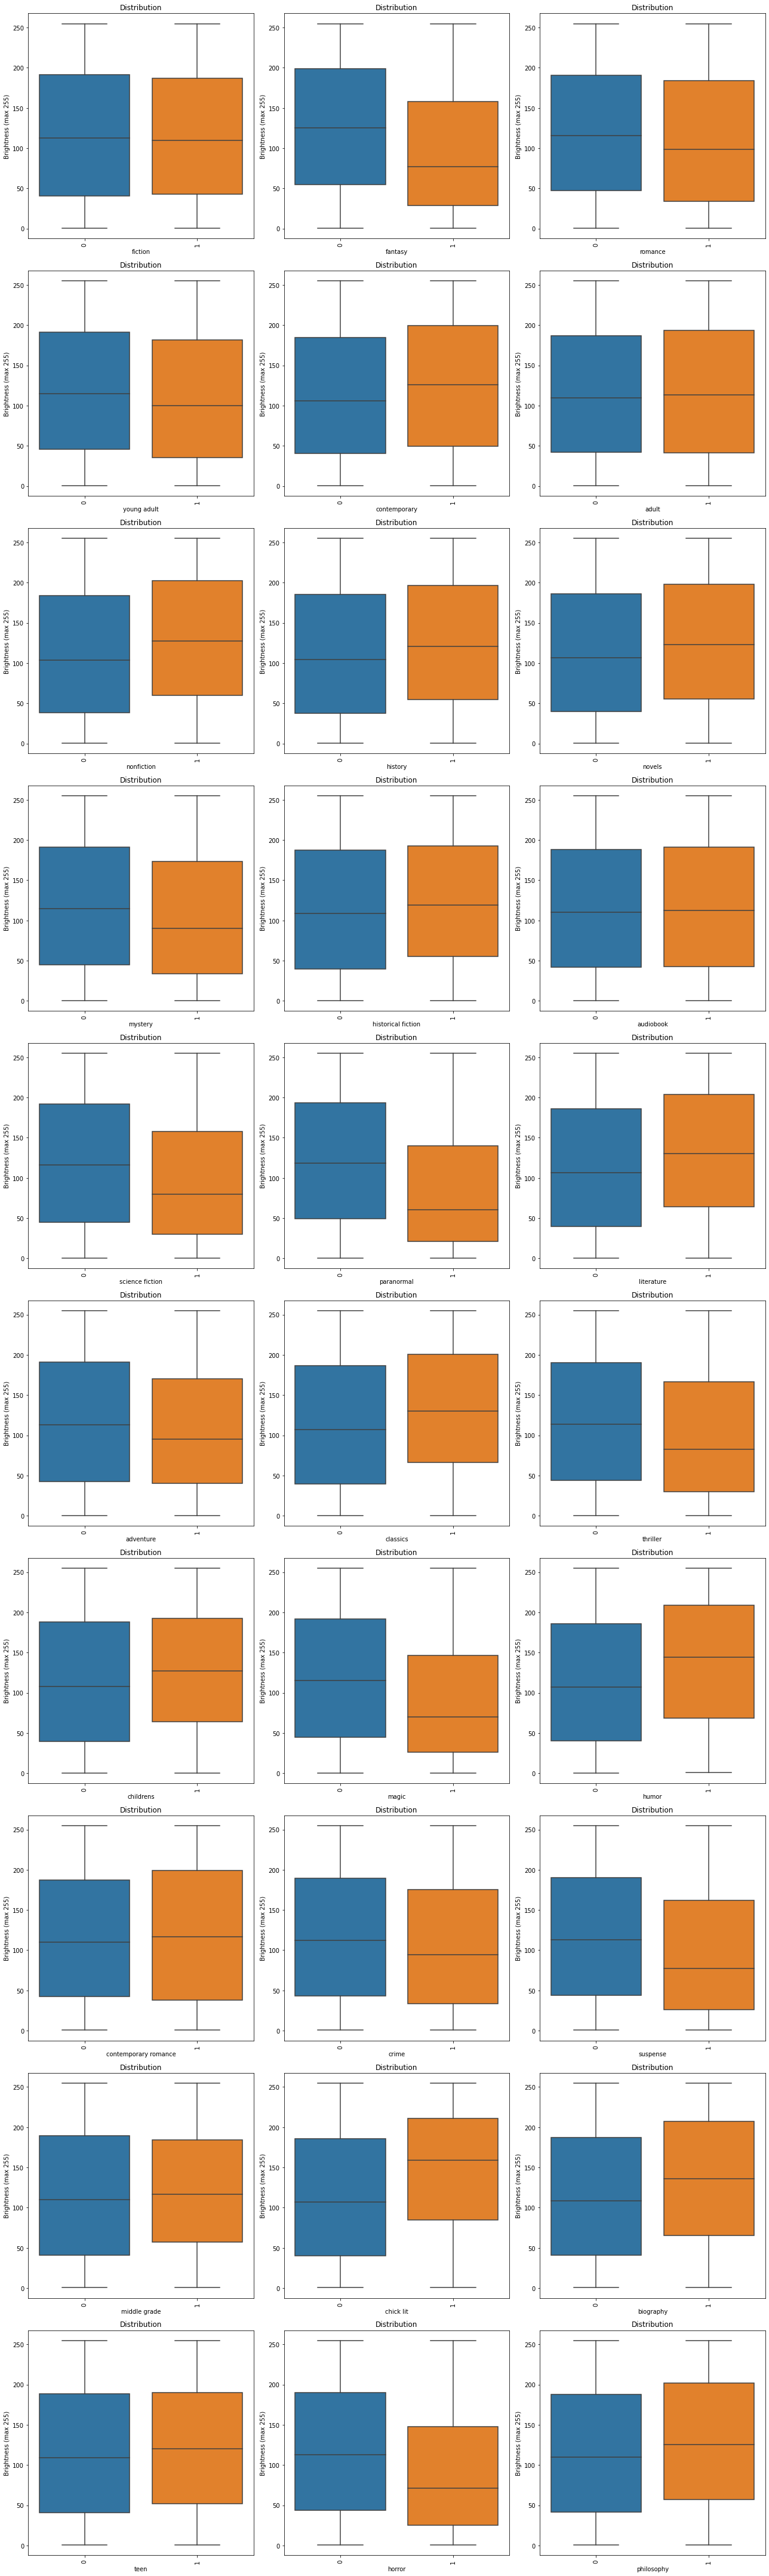

In [ ]:
# Slice out the variables to analyse 
df["brightness"] = pd.to_numeric(df["brightness"])
bright = pd.DataFrame(df['brightness'])

fig = plt.figure(figsize=(18, 60))
num_cols = 3
num_rows = math.ceil(len(top30genrelist)/num_cols)
for idx, col in enumerate(top30genrelist):
    G = df[col]
    jointGR = pd.concat([bright, G], axis = 1).reindex(bright.index)
    # Removing duplicated index values
    jointGR = jointGR.loc[~jointGR.index.duplicated(), :]
    ax = fig.add_subplot(num_rows, num_cols, idx+1)
    # Draw boxplot of the 2 variables
    sb.boxplot(data = jointGR, x = col, y = "brightness")
    ax.set(title='Distribution'.format(col), xlabel=str(col), ylabel='Brightness (max 255)')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Observations from Brightness VS Genre box plot

We can see that:
- **Fantasy, Romance, Mystery, Science Fiction, Paranormal, Magic, Suspense, Horror** books tend to have **lower** brightness
- **Contemporary, Non-Fiction, Literature, Classics, Children, Humor, Chick Lit, Biography, Teen** books tend to have **higher** brightness.

Therefore, we will be using `brightness` as one of our variables to predict the genres.


## **Analysing Ratings vs Genre**
To see if the different ratings affects the genre the book is in.

We plot `Rating of Book` against `Genres` to visualize their mutual relationship.

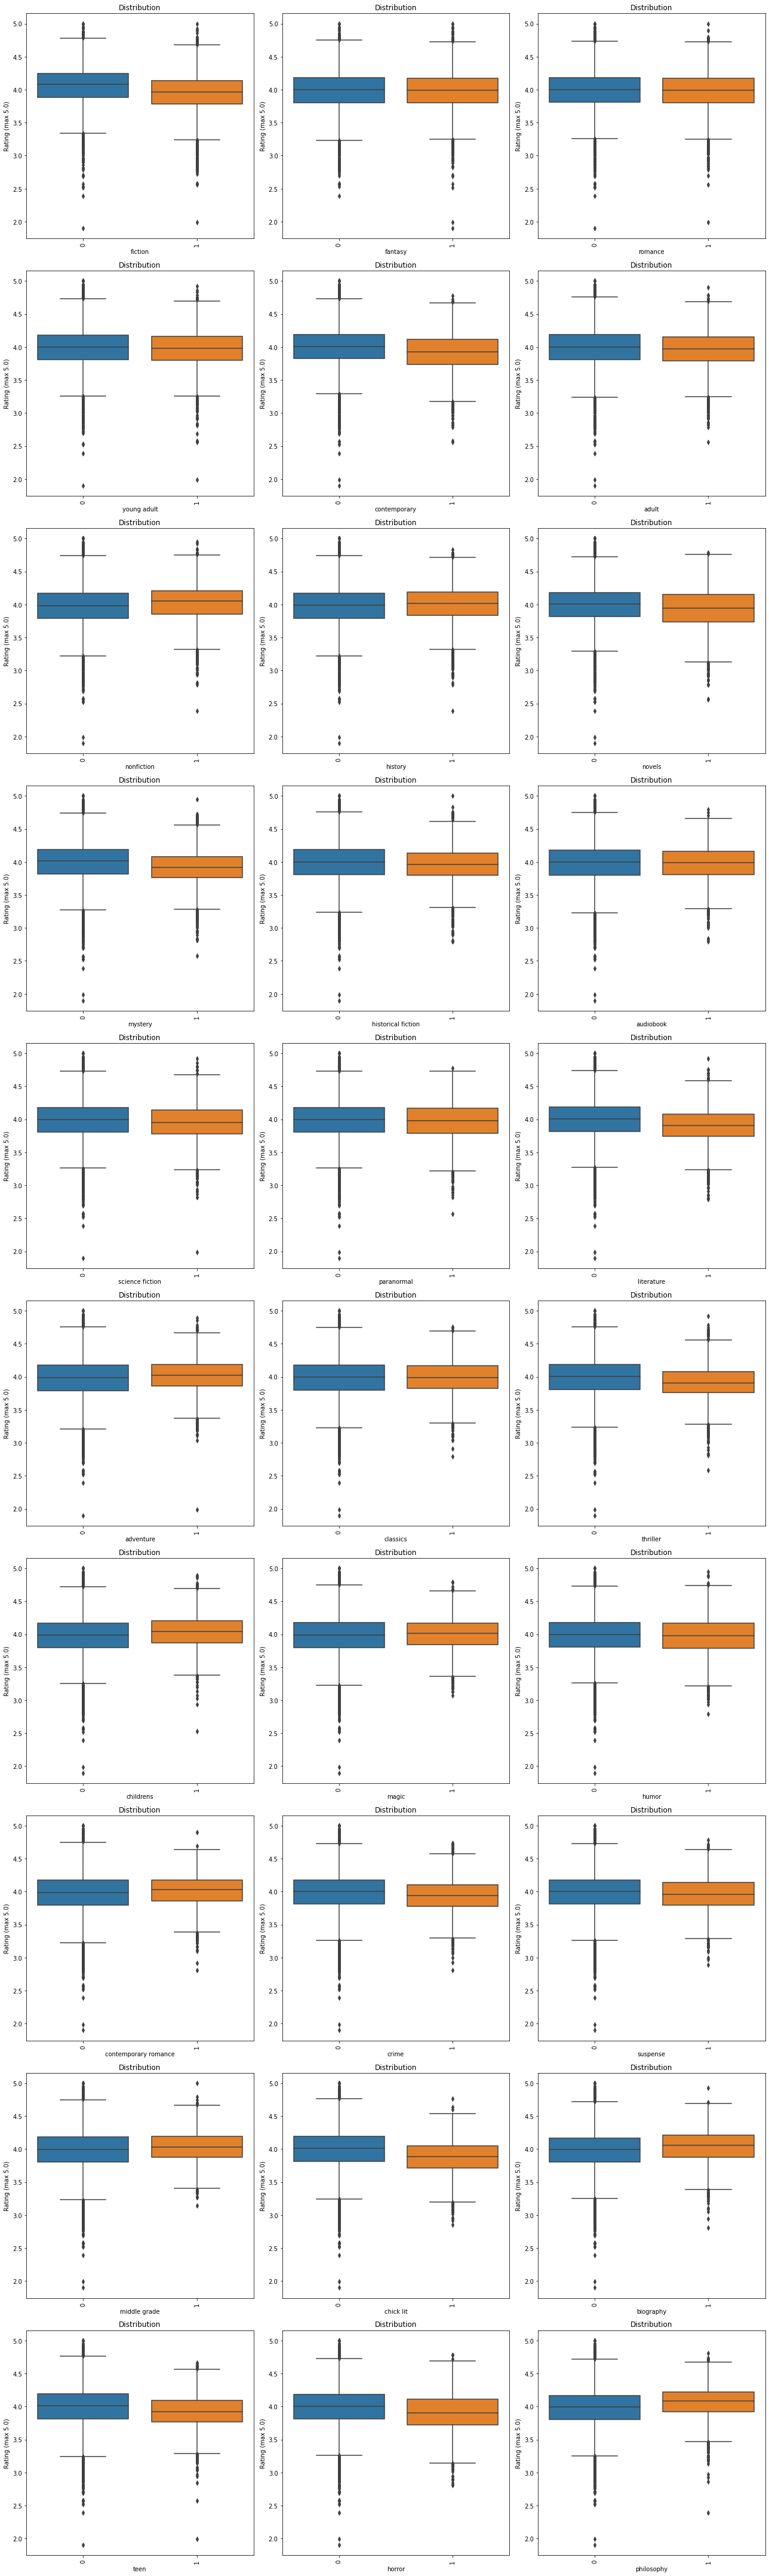

In [ ]:
# Slice out the variables to analyse 
df["rating"] = pd.to_numeric(df["rating"])
rate = pd.DataFrame(df['rating'])

fig = plt.figure(figsize=(18, 60))
num_cols = 3
num_rows = math.ceil(len(top30genrelist)/num_cols)
for idx, col in enumerate(top30genrelist):
    G = df[col]
    jointGR = pd.concat([rate, G], axis = 1).reindex(rate.index)
    # Removing duplicated index values
    jointGR = jointGR.loc[~jointGR.index.duplicated(), :]
    ax = fig.add_subplot(num_rows, num_cols, idx+1)
    # Draw boxplot of the 2 variables
    sb.boxplot(data = jointGR, x = col, y = "rating")
    ax.set(title='Distribution'.format(col), xlabel=str(col), ylabel='Rating (max 5.0)')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Observations from Rating VS Genre box plot

We can see that there **exist no clear correlations** between the Ratings and Genres.

Therefore, we **will not** be using `Ratings` as one of our variables to predict the genres.


## **Analysing numRatings vs Genre**

To see if the different number of ratings affects the genre the book is in.

We plot `numRatings` against `Genres` to visualize their mutual relationship.

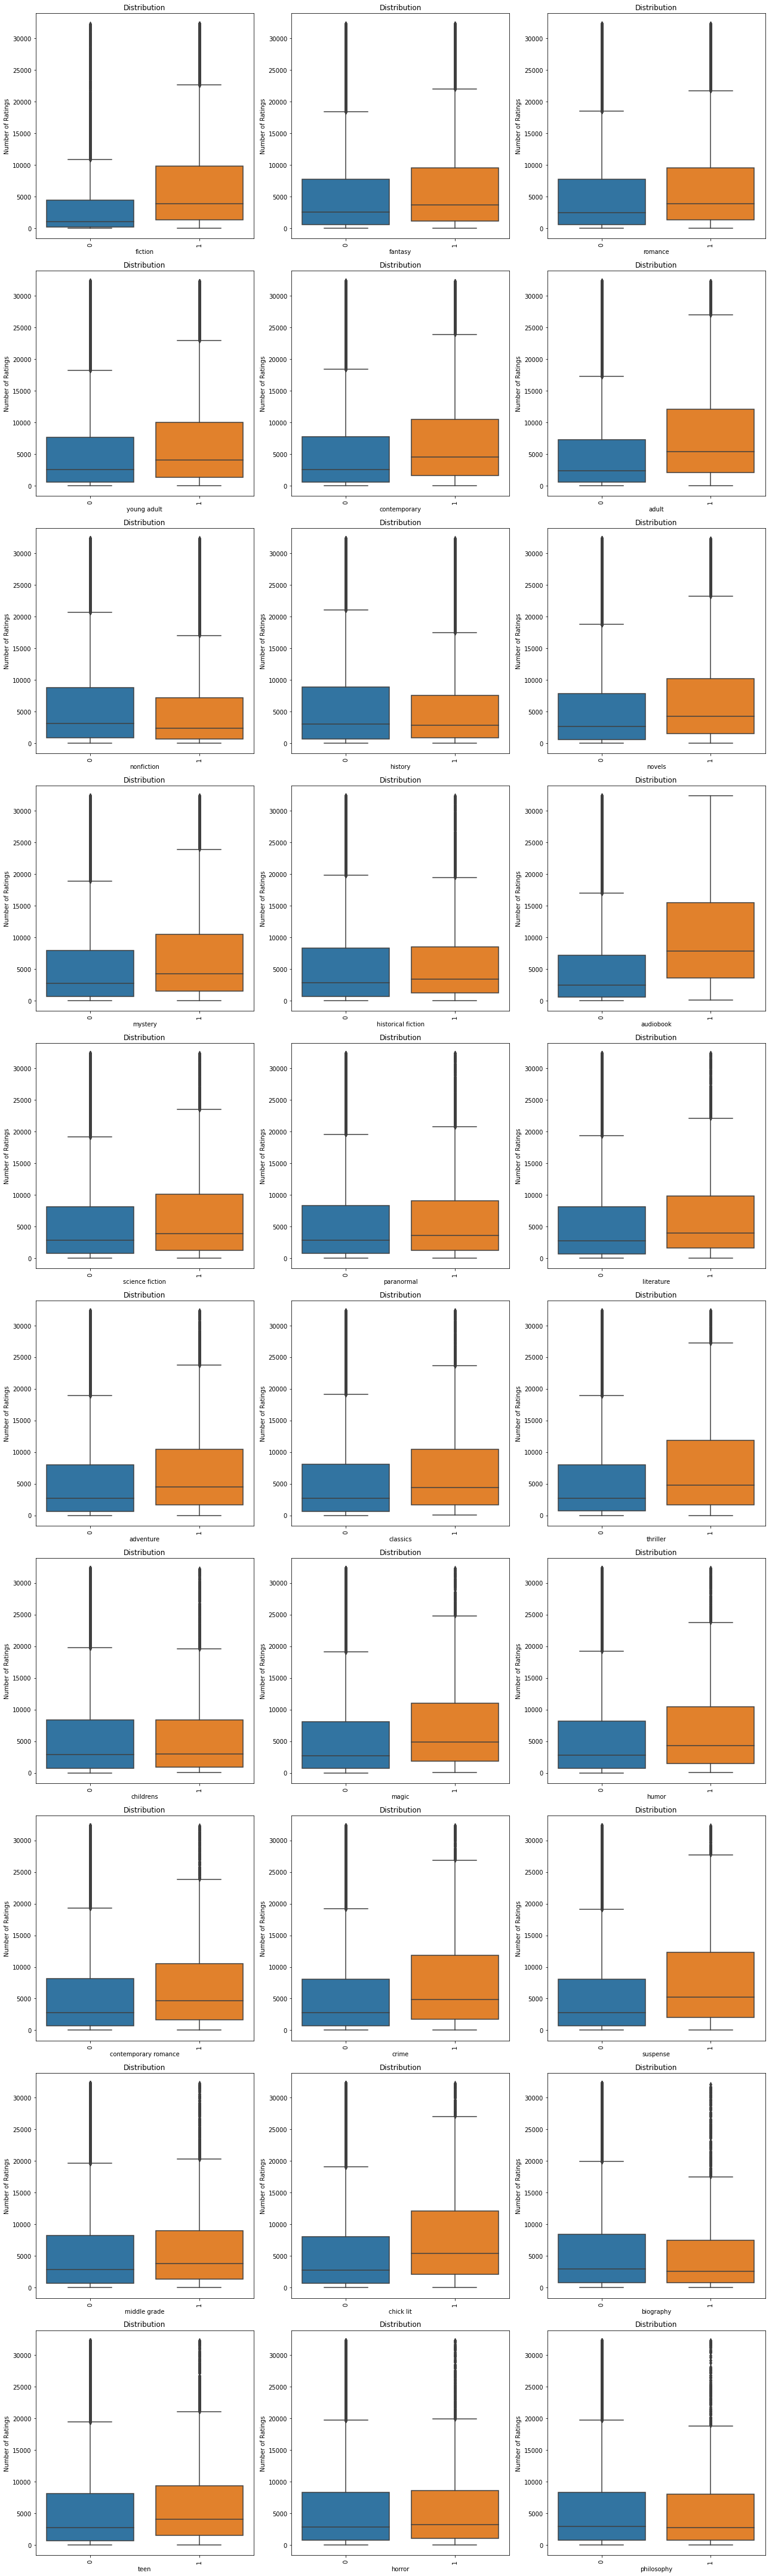

In [ ]:
# Slice out the variables to analyse 
df["numRatings"] = pd.to_numeric(df["numRatings"])
numrate = pd.DataFrame(df['numRatings'])

fig = plt.figure(figsize=(18, 60))
num_cols = 3
num_rows = math.ceil(len(top30genrelist)/num_cols)
for idx, col in enumerate(top30genrelist):
    G = df[col]
    jointGR = pd.concat([numrate, G], axis = 1).reindex(numrate.index)
    # Removing duplicated index values
    jointGR = jointGR.loc[~jointGR.index.duplicated(), :]
    ax = fig.add_subplot(num_rows, num_cols, idx+1)
    # Draw boxplot of the 2 variables
    sb.boxplot(data = jointGR, x = col, y = "numRatings")
    ax.set(title='Distribution'.format(col), xlabel=str(col), ylabel='Number of Ratings')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Observations from Rating VS Genre box plot

- **Fiction, Romance, Adult, Novels, Audiobook, Magic, Suspense, Chick Lit** books tend to have **higher number of ratings** compared to those books that are not in these genres.
- The rest of the genres do not really have a correlation with the number of ratings.

Therefore, we will be using `numRatings` as one of our variables to predict the genres.

## **Analysing Pages vs Genre**

To see if the different number of pages affects the genre the book is in.

We plot `Pages` against `Genres` to visualize their mutual relationship.

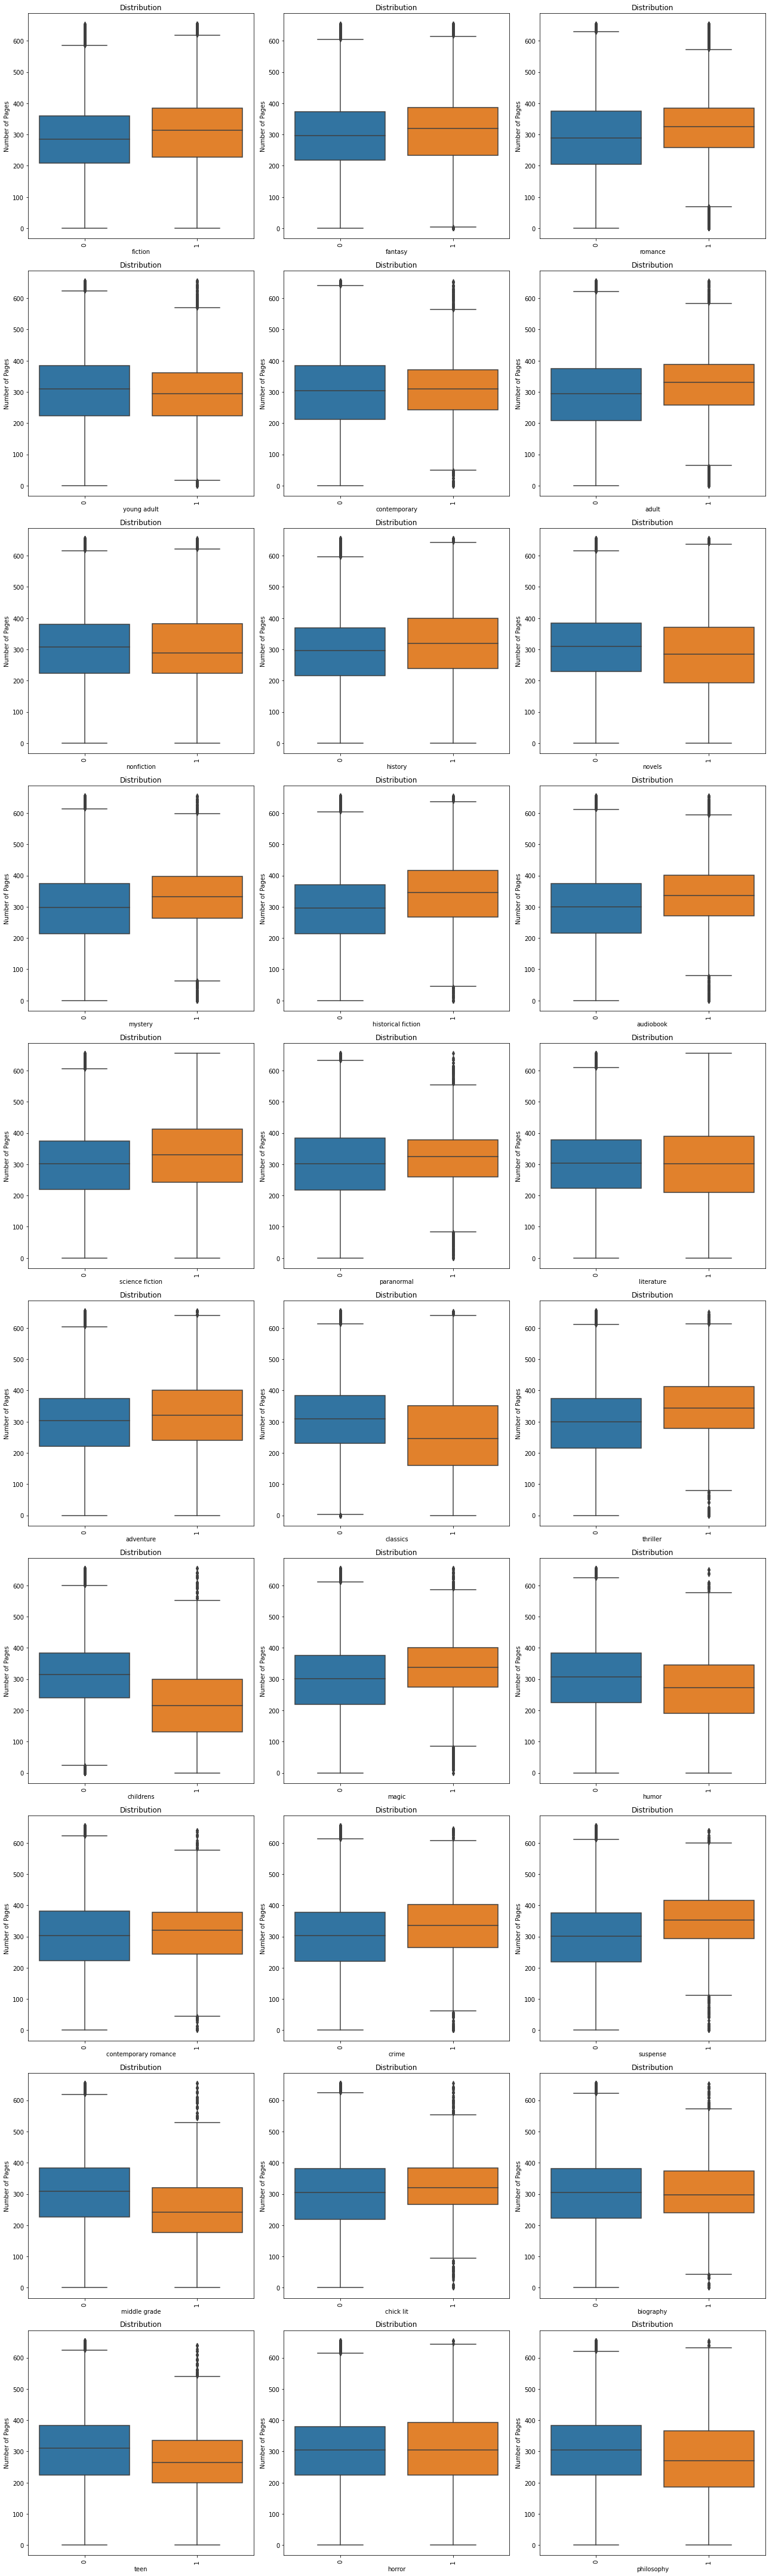

In [ ]:
# Slice out the variables to analyse 
df["pages"] = pd.to_numeric(df["pages"])
pagez = pd.DataFrame(df['pages'])

fig = plt.figure(figsize=(18, 60))
num_cols = 3
num_rows = math.ceil(len(top30genrelist)/num_cols)
for idx, col in enumerate(top30genrelist):
    G = df[col]
    jointGR = pd.concat([pagez, G], axis = 1).reindex(pagez.index)
    # Removing duplicated index values
    jointGR = jointGR.loc[~jointGR.index.duplicated(), :]
    ax = fig.add_subplot(num_rows, num_cols, idx+1)
    # Draw boxplot of the 2 variables
    sb.boxplot(data = jointGR, x = col, y = "pages")
    ax.set(title='Distribution'.format(col), xlabel=str(col), ylabel='Number of Pages')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

Observations from pages VS Genre box plot

We can see that there **exist no clear correlations** between the number of pages and Genres.

Therefore, we **will not** be using `Pages` as one of our variables to predict the genres.

**After analysing the numerical variable, we will be keeping the Brightness and numRatings as variables to help us predict the genres.**

# **End of EDA Notebook!** 
# **Please proceed to Modeling Notebook:-)** 